In [34]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister
import logging
import random

In [35]:

logger = logging.getLogger(__name__)

def random_quantum_circuit(num_q:int, num_a:int, num_g:int=10) -> QuantumCircuit:
    in_q = QuantumRegister(num_q, name='cq')
    an_q = QuantumRegister(num_a, name='aq')
    
    circuit = QuantumCircuit(in_q, an_q)
    
    for i in range(num_g):
        
        if random.random() < 0.75: # Input acts on Ancilla    
            control_q = in_q
            target_q = an_q

        else: # Ancilla acts on input
            control_q = an_q
            target_q = in_q

        num_controls = random.randint(1, control_q.size)
        controls = random.sample(range(control_q.size), num_controls)  # Get control qubit/s
        target = random.randrange(target_q.size) # Get target qubit
        print(num_controls, controls, target)
        circuit.mcx([control_q[cq] for cq in controls],target_q[target]) 

    logger.info(f'Built circuit with {num_q} input, {num_a} ancilla and {num_g} gates.')
    return circuit

In [36]:
num_q=4
num_a=4
num_g=5
circuit = random_quantum_circuit(num_q,num_a,num_g)

1 [2] 3
2 [3, 2] 1
4 [0, 3, 2, 1] 2
3 [1, 2, 0] 1
4 [0, 1, 2, 3] 1


In [37]:
def breakdown_qubit(qubit: qiskit.circuit.Qubit):
    return {'name':qubit._register.name, 'wire':qubit._index, 'qubit':qubit, 'label':qubit._register.name+str(qubit._index)}



In [38]:
ancillas_list = [breakdown_qubit(q)['label'] for q in circuit.qubits][-num_a:]

In [39]:
ancillas_list

['aq0', 'aq1', 'aq2', 'aq3']

In [40]:
circuit2 = QuantumCircuit(6)
for i in range(3):
    circuit2.h(i)
    
circuit2.cx(0,3)
circuit2.cx(1,3)


circuit2.cx(3,0)

circuit2.cx(4,3)
circuit2.cx(3,4)

circuit2.cx(2,3)

circuit2.cx(3,4)
circuit2.cx(4,3)

# circuit.cx(0,5)
# circuit.cx(1,5)
# circuit.cx(2,5)

circuit2.draw()

┌───┐          ┌───┐                         
q_0: ┤ H ├──■───────┤ X ├─────────────────────────
     ├───┤  │       └─┬─┘                         
q_1: ┤ H ├──┼────■────┼───────────────────────────
     ├───┤  │    │    │                           
q_2: ┤ H ├──┼────┼────┼──────────────■────────────
     └───┘┌─┴─┐┌─┴─┐  │  ┌───┐     ┌─┴─┐     ┌───┐
q_3: ─────┤ X ├┤ X ├──■──┤ X ├──■──┤ X ├──■──┤ X ├
          └───┘└───┘     └─┬─┘┌─┴─┐└───┘┌─┴─┐└─┬─┘
q_4: ──────────────────────■──┤ X ├─────┤ X ├──■──
                              └───┘     └───┘     
q_5: ─────────────────────────────────────────────

In [41]:
import sys

if not '../' in sys.path:
    sys.path.insert(1, '../')

from qiskit.circuit.random.utils import random_circuit

In [42]:
circuit3 = QuantumCircuit(QuantumRegister(5, 'cq'), QuantumRegister(3, 'aq'))
for i in range(5):
    circuit3.x(i)
    circuit3.h(i)
    
rc = random_circuit(num_qubits=8, depth=5)

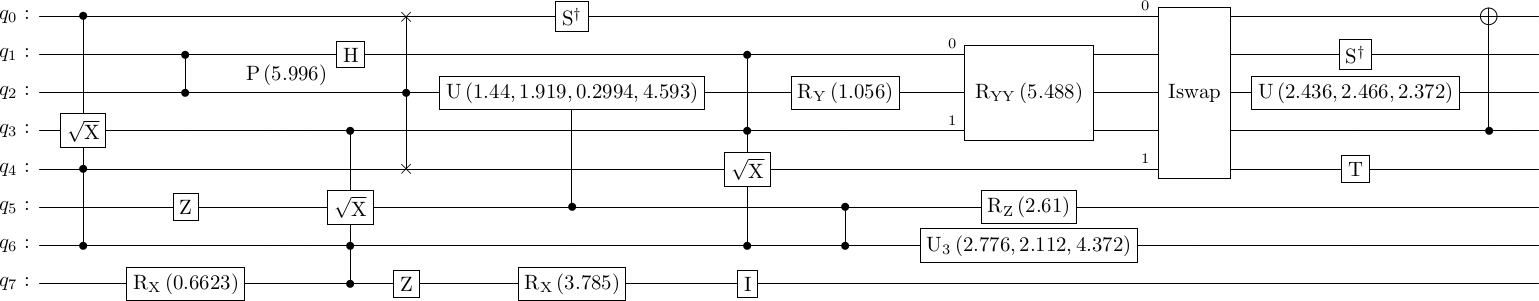

In [43]:
rc.draw('latex')

In [44]:
rc.name= 'Random Generated Circuit'
custom = rc.to_gate()
circuit3.append(custom, circuit3.qubits)

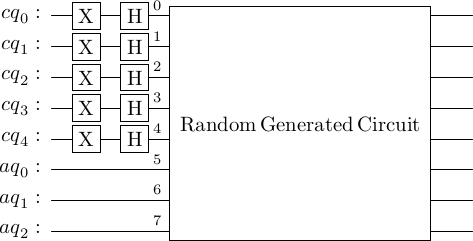

In [45]:
circuit3.draw('latex')

In [58]:
def random_quantum_circuit_large_distinct_nums(num_q, num_a) -> tuple[QuantumCircuit,int,int,int]:
    
    # num_q = random.randint(3,10)
    # num_a = random.randint(3,10)
    # num_g = random.randint(50, 100)
    # num_g = random.randint(10,50)
    num_g = 8

    cc_gates = 0
    ca_gates = 0
    ac_gates = 0
    aa_gates = 0
    
    in_q = QuantumRegister(num_q, name='cq')
    an_q = QuantumRegister(num_a, name='aq')
    
    circuit = QuantumCircuit(in_q, an_q)

    for q in in_q:
        circuit.x(q)
        circuit.h(q)
    
    for i in range(num_g):

        control_q = in_q
        target_q = in_q

        change_target_controls = random.random()

        if change_target_controls > 0.8: # Input acts on Input only    
            control_q = an_q
            target_q = an_q
            aa_gates += 1

        elif change_target_controls > 0.4: 
            # control_q = in_q
            if random.random() > 0.5:
                target_q = an_q
                ca_gates += 1
            else:
                control_q = an_q
                ac_gates += 1

        else:
            cc_gates += 1 
            

        num_controls = random.randrange(1, control_q.size)
        target = random.randrange(target_q.size) # Get target qubit
        controls = random.sample(range(control_q.size), num_controls)  # Get control qubit/s
        # target = random.randrange(target_q.size) # Get target qubit
        if control_q == target_q:
            target = random.randrange(target_q.size) # Get target qubit
            valid_controls = list(range(control_q.size))
            valid_controls.remove(target)
            controls = random.sample(valid_controls, num_controls)  # Get control qubit/s
        else:
            target = random.randrange(target_q.size) # Get target qubit
            controls = random.sample(range(control_q.size), num_controls)  # Get control qubit/s
        
        # print(num_controls, controls, target)
        circuit.mcx([control_q[cq] for cq in controls],target_q[target]) 

    # logger.info(f'Built circuit with {num_q} input, {num_a} ancilla and {num_g} gates.')
    # logger.info(f'There are {cc_gates} gates acting between control qubits, {ca_gates} gates acting between control and ancilla, {ac_gates} gates acting between ancilla and control and {aa_gates} gates acting between just the ancillas.')
    print(f'Built circuit with {num_q} input, {num_a} ancilla and {num_g} gates.')
    print(f'There are {cc_gates} gates acting between control qubits, {ca_gates} gates acting between control and ancilla, {ac_gates} gates acting between ancilla and control and {aa_gates} gates acting between just the ancillas.')
    
    return circuit, num_q, num_a, num_g


In [67]:
c4, q,a,g = random_quantum_circuit_large_distinct_nums(3,5)

Built circuit with 3 input, 5 ancilla and 8 gates.
There are 1 gates acting between control qubits, 4 gates acting between control and ancilla, 1 gates acting between ancilla and control and 2 gates acting between just the ancillas.


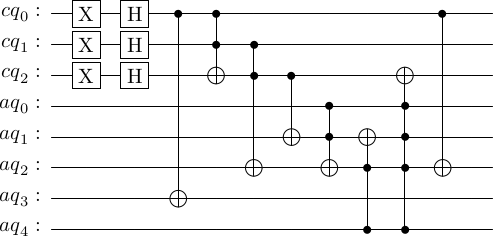

In [68]:
c4.draw('latex')